# Business Sales Dashboard & Reporting System

**Project goal:** Analyze sales data to compute KPIs and visualize trends to support business decisions.

**Stack:** Python (Pandas, NumPy, Matplotlib), MySQL (data source), Google Colab

Sections:
1. Data Import & Cleaning
2. Data Merge
3. Key Metrics (KPIs)
4. Visualizations
5. Additional Analysis
6. Insights & Conclusion


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

np.random.seed(42)


In [ ]:
products = [
    (101, "Widget A", 9.99),
    (102, "Widget B", 12.50),
    (103, "Gadget C", 19.99),
    (104, "Gadget D", 29.99),
    (105, "Accessory E", 4.99),
    (106, "Accessory F", 6.49),
    (107, "Device G", 49.99),
    (108, "Device H", 79.99),
    (109, "Tool I", 14.99),
    (110, "Tool J", 24.99)
]

products_df = pd.DataFrame(products, columns=["product_id","product_name","price"])
products_df.to_csv('/content/products.csv', index=False)
products_df.head()


,product_id,product_name,price
0,101,Widget A,9.99
1,102,Widget B,12.50
2,103,Gadget C,19.99
3,104,Gadget D,29.99
4,105,Accessory E,4.99


In [ ]:
customer_count = 500
customer_ids = np.arange(1000, 1000+customer_count)
names = [f"CUST_{i}" for i in range(customer_count)]
signup_dates = np.random.choice(pd.date_range('2023-01-01','2024-12-31'), size=customer_count)

customers_df = pd.DataFrame({
    "customer_id": customer_ids,
    "customer_name": names,
    "signup_date": signup_dates
})
customers_df.to_csv('/content/customers.csv', index=False)
customers_df.head()


,customer_id,customer_name,signup_date
0,1000,CUST_0,2023-04-13
1,1001,CUST_1,2024-03-11
2,1002,CUST_2,2023-09-28
3,1003,CUST_3,2023-04-17
4,1004,CUST_4,2023-03-13


In [ ]:
N = 2000
order_ids = np.arange(1, N+1)
order_dates = np.random.choice(pd.date_range('2024-01-01','2024-12-31'), size=N)
cust_choice = np.random.choice(customers_df['customer_id'], size=N)
prod_choice = np.random.choice(products_df['product_id'], size=N)

price_map = dict(zip(products_df['product_id'], products_df['price']))
unit_prices = [price_map[p] for p in prod_choice]
quantities = np.random.randint(1, 6, size=N)
revenues = np.round(np.array(unit_prices) * quantities, 2)

orders_df = pd.DataFrame({
    "order_id": order_ids,
    "order_date": order_dates,
    "customer_id": cust_choice,
    "product_id": prod_choice,
    "unit_price": unit_prices,
    "quantity": quantities,
    "revenue": revenues
})

orders_df = orders_df.merge(products_df[['product_id','product_name']], on='product_id', how='left')

orders_df.to_csv('/content/orders.csv', index=False)
orders_df.head()


,order_id,order_date,customer_id,product_id,unit_price,quantity,revenue,product_name
0,1,2024-02-02,1111,110,24.99,2,49.98,Tool J
1,2,2024-06-27,1251,109,14.99,2,29.98,Tool I
2,3,2024-04-10,1081,105,4.99,2,9.98,Accessory E
3,4,2024-09-24,1231,109,14.99,2,29.98,Tool I
4,5,2024-11-18,1226,102,12.50,5,62.50,Widget B


In [ ]:
products = pd.read_csv('/content/products.csv')
customers = pd.read_csv('/content/customers.csv')
orders = pd.read_csv('/content/orders.csv')

print("Products:", products.shape)
print("Customers:", customers.shape)
print("Orders:", orders.shape)

total_revenue = orders['revenue'].sum()
total_orders = orders['order_id'].nunique()
unique_customers = orders['customer_id'].nunique()
avg_order_value = round(total_revenue / total_orders, 2)

print("\n📊 Key Business Metrics")
print("Total Revenue: $", total_revenue)
print("Total Orders:", total_orders)
print("Unique Customers:", unique_customers)
print("Average Order Value (AOV): $", avg_order_value)


Products: (10, 3)
Customers: (500, 3)
Orders: (2000, 8)

📊 Key Business Metrics
Total Revenue: $ 151268.34000000003
Total Orders: 2000
Unique Customers: 494
Average Order Value (AOV): $ 75.63


In [ ]:
!pip install sqlalchemy pymysql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.2 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving customers.csv to customers (1).csv
Saving orders.csv to orders (1).csv
Saving products.csv to products (1).csv


## 1. Data Import & Cleaning

This section loads `customers.csv`, `orders.csv`, and `products.csv` into pandas DataFrames.
It also performs minimal cleaning (date parsing, type checks) so data is analysis-ready.


In [ ]:
import pandas as pd

customers = pd.read_csv("customers.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")


print(customers.head())
print(orders.head())
print(products.head())



   customer_id customer_name signup_date
0         1000        CUST_0  2023-04-13
1         1001        CUST_1  2024-03-11
2         1002        CUST_2  2023-09-28
3         1003        CUST_3  2023-04-17
4         1004        CUST_4  2023-03-13
   order_id  order_date  customer_id  product_id  unit_price  quantity  \
0         1  2024-02-02         1111         110       24.99         2   
1         2  2024-06-27         1251         109       14.99         2   
2         3  2024-04-10         1081         105        4.99         2   
3         4  2024-09-24         1231         109       14.99         2   
4         5  2024-11-18         1226         102       12.50         5   

   revenue product_name  
0    49.98       Tool J  
1    29.98       Tool I  
2     9.98  Accessory E  
3    29.98       Tool I  
4    62.50     Widget B  
   product_id product_name  price
0         101     Widget A   9.99
1         102     Widget B  12.50
2         103     Gadget C  19.99
3         104    

## 2. Data Merge & Cleaning

Merge `orders`, `customers`, and `products` into a single DataFrame `df`.
Also resolve duplicate column names (e.g., product_name_x/product_name_y) and convert date columns to datetime.


In [ ]:
df = orders.merge(products, on="product_id", how="left") \
           .merge(customers, on="customer_id", how="left")

print(df.head())
print(df.columns)


   order_id  order_date  customer_id  product_id  unit_price  quantity  \
0         1  2024-02-02         1111         110       24.99         2   
1         2  2024-06-27         1251         109       14.99         2   
2         3  2024-04-10         1081         105        4.99         2   
3         4  2024-09-24         1231         109       14.99         2   
4         5  2024-11-18         1226         102       12.50         5   

   revenue product_name_x product_name_y  price customer_name signup_date  
0    49.98         Tool J         Tool J  24.99      CUST_111  2023-10-16  
1    29.98         Tool I         Tool I  14.99      CUST_251  2023-05-28  
2     9.98    Accessory E    Accessory E   4.99       CUST_81  2024-03-31  
3    29.98         Tool I         Tool I  14.99      CUST_231  2023-05-03  
4    62.50       Widget B       Widget B  12.50      CUST_226  2024-02-20  
Index(['order_id', 'order_date', 'customer_id', 'product_id', 'unit_price',
       'quantity', 'rev

## 3. Key Metrics (KPIs)

We compute:
- Total Revenue
- Average Order Value (AOV)
- Top Products by revenue
- Monthly revenue trend


In [ ]:
total_revenue = df['revenue'].sum()

aov = df.groupby('order_id')['revenue'].sum().mean()

top_products = df.groupby('product_name_x')['revenue'].sum().sort_values(ascending=False).head(5)

df['order_date'] = pd.to_datetime(df['order_date'])
monthly_revenue = df.groupby(df['order_date'].dt.to_period("M"))['revenue'].sum()

## 4. Visualizations

Charts included:
- Monthly Revenue Trend (line chart)
- Top 5 Products by Revenue (bar chart)
- Top Customers by Revenue (bar chart)

Each chart is followed by interpretation notes.


Total Revenue: 151268.34000000003
Average Order Value (AOV): 75.63417000000001


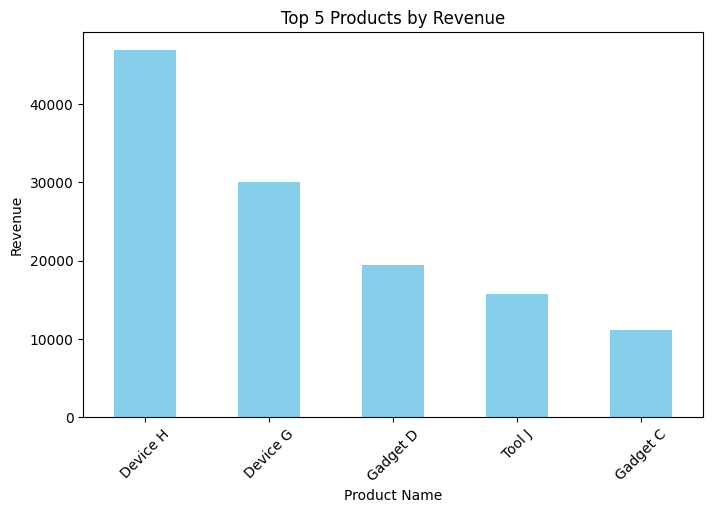

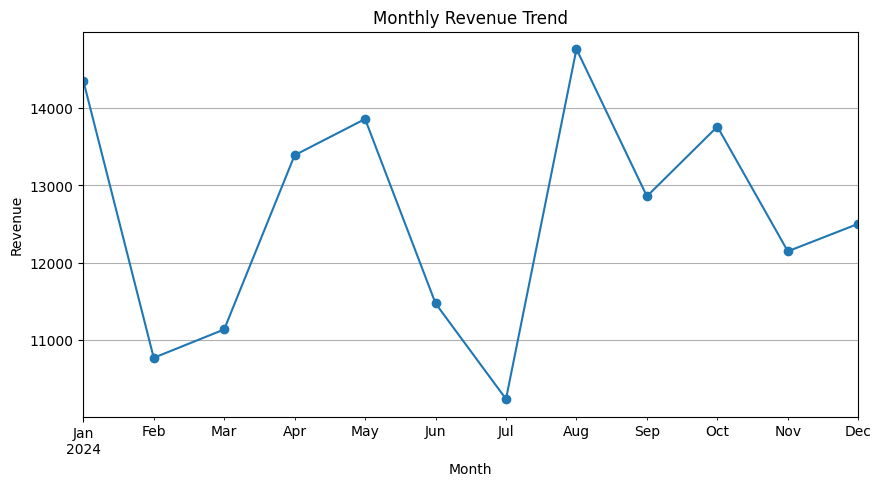

In [ ]:
import matplotlib.pyplot as plt


print("Total Revenue:", total_revenue)
print("Average Order Value (AOV):", aov)


top_products.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title("Top 5 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

monthly_revenue.plot(kind='line', figsize=(10,5), marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


## 5. Additional Analysis

Extra insights:
- Top customers by lifetime revenue


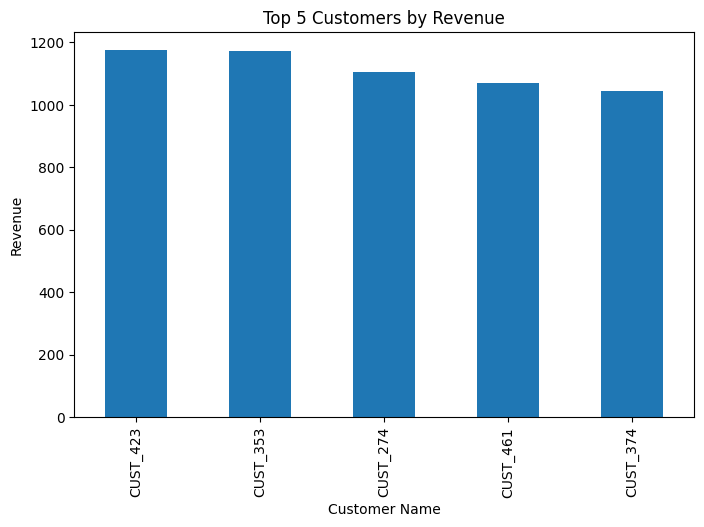

In [ ]:
top_customers = df.groupby('customer_name')['revenue'].sum().sort_values(ascending=False).head(5)
top_customers.plot(kind='bar', figsize=(8,5))
plt.title("Top 5 Customers by Revenue")
plt.xlabel("Customer Name")
plt.ylabel("Revenue")
plt.show()


## 6. Insights & Conclusion

- Total Revenue: 151268.34

- Average Order Value (AOV): 75.63417000000001


**Business recommendations:**
1. Focus promotions on top 3 products to increase short-term revenue.
2. Implement retention programs for top customers identified.

